<a href="https://colab.research.google.com/github/Amanblackdevil/Machine-Learning/blob/main/Decision_Tree_Classifier_Iris_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
upload_files = files.upload()
import io

Saving Iris.csv to Iris.csv


In [ ]:
df = pd.read_csv(io.BytesIO(upload_files['Iris.csv']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
#removing unneeded column
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


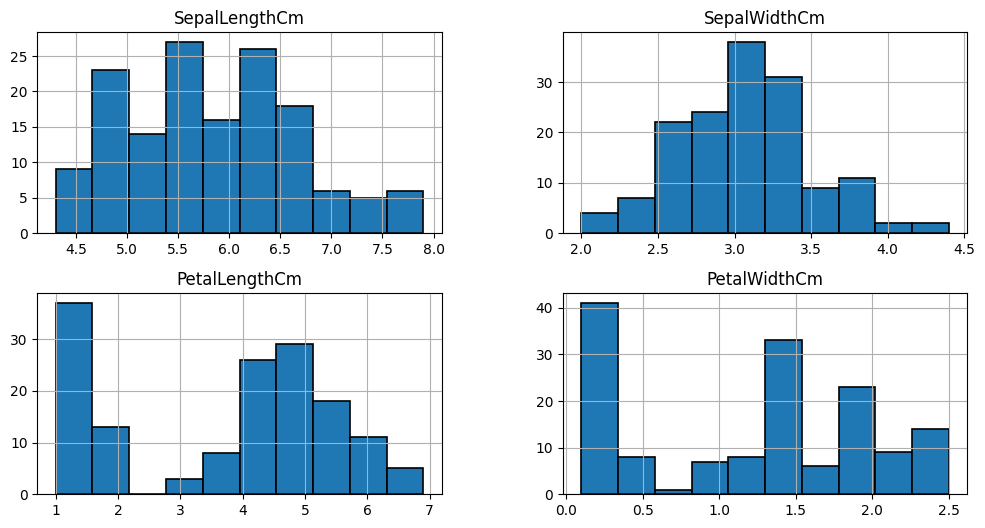

In [ ]:
#how the length and width are distributed
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42)

train.shape, test.shape

((105, 5), (45, 5))

In [ ]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_Y = train.Species
test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_Y = test.Species

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is', accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is', accuracy_score(prediction,test_Y))

The accuracy of the KNN is 1.0


<ipython-input-19-42c062af16ec>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
<ipython-input-19-42c062af16ec>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(prediction,test_Y)))
<ipython-input-19-42c062af16ec>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(prediction,test_Y)))
<ipython-input-19-42c062af16ec>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(prediction,test_Y)))
<ipython-input-19-42c062af16ec>:8: FutureWarning: The series.append method is deprecated and will be rem

([<matplotlib.axis.XTick at 0x7857d60c2800>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

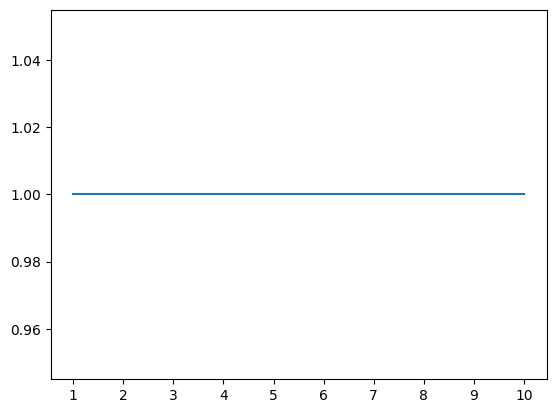

In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)